In [1]:
import pandas as pd

from lets_plot import *


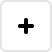
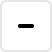
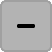
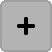
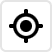
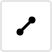
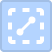
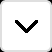
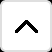
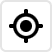
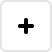
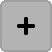
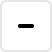
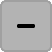
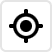
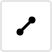
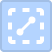
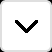
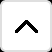
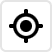

In [2]:
LetsPlot.setup_html()

In [3]:
mtcars = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mtcars.csv")
print(mtcars.shape)
mtcars.head()

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
number_to_word = {
    3: 'three', 4: 'four', 5: 'five',
}
mtcars_2 = mtcars.assign(gear=mtcars['gear'].replace(number_to_word))
print(mtcars_2.shape)
mtcars_2.head()

(32, 12)


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,four,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,four,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,four,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,three,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,three,2


## Code from issue

In [5]:
# graph 1: looks great!  but i'd like to add more information
p1 = ggplot(mtcars_2, aes(x='cyl', y='hp')) + geom_violin(bw=20) + geom_sina()

# graph 2: now there is a violin plot for every cyl:gear combination, which is too busy
p2 = ggplot(mtcars_2, aes(x='cyl', y='hp', color='gear')) + geom_violin(bw=20) + geom_sina()

# graph 3: this should plot single violin plots for each 'cyl' level, regardless of 'gear', but just color the gear points differently
p3 = ggplot(mtcars_2, aes(x='cyl', y='hp', color='gear', group='cyl')) + geom_violin(bw=20) + geom_sina()

gggrid([p1, p2, p3], ncol=1) + ggsize(height=600, width=600)

## Modified examples

In [6]:
p1 = ggplot(mtcars, aes(x='cyl', y='hp')) + geom_violin(bw=20) + geom_sina(bw=20, seed=42)

p2 = ggplot(mtcars, aes(x='cyl', y='hp', color='gear')) + geom_violin(bw=20) + geom_sina(bw=20, seed=42)

p3 = ggplot(mtcars, aes(x='cyl', y='hp')) + geom_violin(bw=20) + geom_sina(aes(color='gear'), bw=20, seed=42) + \
    scale_color_manual(values=["red", "green", "blue"], breaks=[3, 4, 5])

gggrid([p1, p2, p3], ncol=1) + ggsize(height=600, width=600)